In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

In [2]:
data=pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# Data distribution visualization

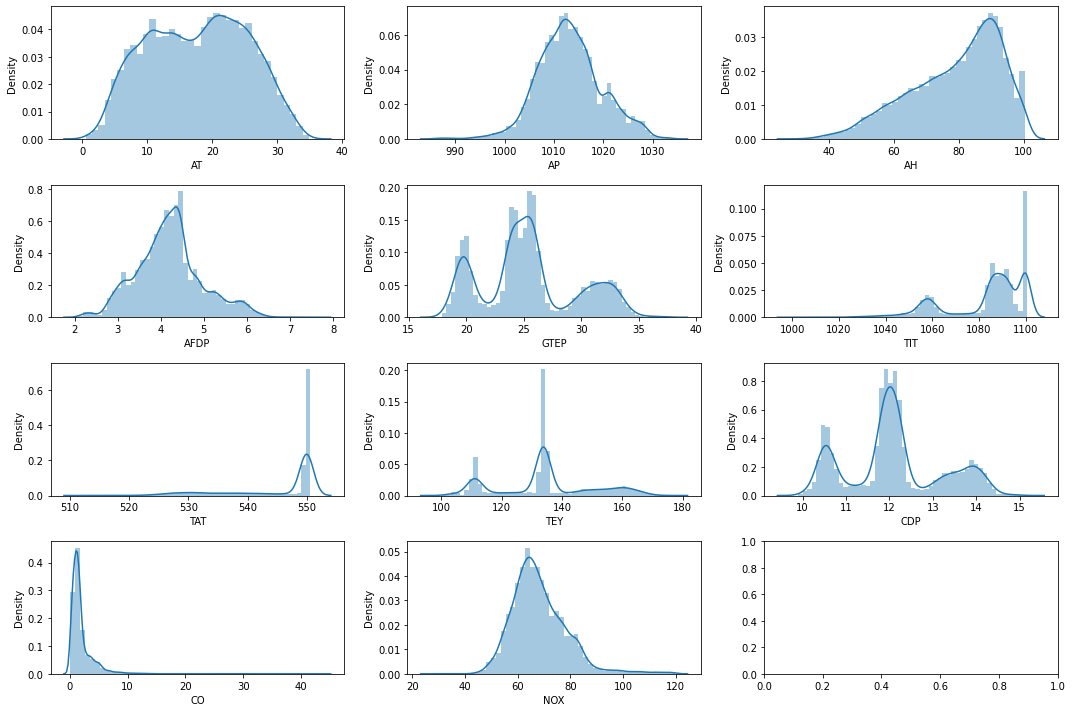

In [3]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2])
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1])
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0])
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2])
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [5]:
seed=7
np.random.seed(seed)
x=data.drop(["TEY"],axis=1).values
y=data["TEY"].values

In [6]:
x

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [7]:
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [9]:
history=model.fit(x,y,validation_split=0.33,epochs=100,batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 23s 15ms/step - loss: 0.0100 - accuracy: 9.9246e-05 - val_loss: 0.0012 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 12s 12ms/step - loss: 6.4817e-04 - accuracy: 9.9246e-05 - val_loss: 6.5710e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 12s 12ms/step - loss: 4.9122e-04 - accuracy: 9.9246e-05 - val_loss: 6.2091e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 12s 12ms/step - loss: 3.9076e-04 - accuracy: 9.9246e-05 - val_loss: 4.0234e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 13s 13ms/step - loss: 3.3653e-04 - accuracy: 9.9246e-05 - val_loss: 3.1274e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 12s 12ms/step - loss: 3.0194e-04 - accuracy: 9.9246e-05 - val_loss: 2.9820e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [=======

1008/1008 [==============================] - 11s 11ms/step - loss: 2.6484e-04 - accuracy: 9.9246e-05 - val_loss: 2.3665e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6466e-04 - accuracy: 9.9246e-05 - val_loss: 2.9341e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6820e-04 - accuracy: 9.9246e-05 - val_loss: 2.6204e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6631e-04 - accuracy: 9.9246e-05 - val_loss: 2.5076e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6199e-04 - accuracy: 9.9246e-05 - val_loss: 2.4699e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.7017e-04 - accuracy: 9.9246e-05 - val_loss: 2.6435e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=====

In [10]:
scores=model.evaluate(x,y)
print("%s:%.2f%%"%(model.metrics_names[1],scores[1]*100))

470/470 [==============================] - 4s 8ms/step - loss: 2.3987e-04 - accuracy: 1.3299e-04
accuracy:0.01%


In [11]:
history = model.fit(x, y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 13s 13ms/step - loss: 2.6135e-04 - accuracy: 9.9246e-05 - val_loss: 2.3419e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 12s 12ms/step - loss: 2.6794e-04 - accuracy: 9.9246e-05 - val_loss: 2.3462e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 12s 12ms/step - loss: 2.6696e-04 - accuracy: 9.9246e-05 - val_loss: 2.4167e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 13s 13ms/step - loss: 2.6234e-04 - accuracy: 9.9246e-05 - val_loss: 2.4903e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 13s 12ms/step - loss: 2.6360e-04 - accuracy: 9.9246e-05 - val_loss: 2.6782e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 12s 12ms/step - loss: 2.5955e-04 - accuracy: 9.9246e-05 - val_loss: 2.6503e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 

1008/1008 [==============================] - 12s 12ms/step - loss: 2.6062e-04 - accuracy: 9.9246e-05 - val_loss: 2.4653e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 12s 12ms/step - loss: 2.5736e-04 - accuracy: 9.9246e-05 - val_loss: 2.7187e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6374e-04 - accuracy: 9.9246e-05 - val_loss: 2.3206e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.5945e-04 - accuracy: 9.9246e-05 - val_loss: 2.4603e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 11s 11ms/step - loss: 2.6016e-04 - accuracy: 9.9246e-05 - val_loss: 2.5527e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 17s 17ms/step - loss: 2.6001e-04 - accuracy: 9.9246e-05 - val_loss: 2.3577e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=====

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

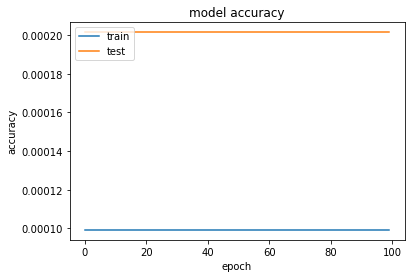

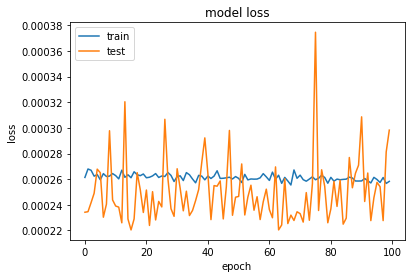

In [13]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [15]:
def create_model():
    model=Sequential()
    model.add(Dense(11, input_dim=10 , activation='sigmoid'))
    model.add(Dense(11, activation='sigmoid'))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model
    

In [16]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,40]
epochs=[10,50,100]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.5min
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [17]:
print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{}with:{}".format(mean,stdev,param))

Best:0.0,using{'batch_size': 10, 'epochs': 10}
0.0,0.0with:{'batch_size': 10, 'epochs': 10}
0.0,0.0with:{'batch_size': 10, 'epochs': 50}
0.0,0.0with:{'batch_size': 10, 'epochs': 100}
0.0,0.0with:{'batch_size': 20, 'epochs': 10}
0.0,0.0with:{'batch_size': 20, 'epochs': 50}
0.0,0.0with:{'batch_size': 20, 'epochs': 100}
0.0,0.0with:{'batch_size': 40, 'epochs': 10}
0.0,0.0with:{'batch_size': 40, 'epochs': 50}
0.0,0.0with:{'batch_size': 40, 'epochs': 100}


In [18]:
from keras.layers import Dropout
def create_model(learning_rate,dropout_rate):
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(dropout_rate))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
    
    activation_function=["softmax","relu","tanh","linear"]
    init=["uniform","normal","zero"]
    
    param_grid=dict(activation_function=activtion_function,init=init)
    
    grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.4min
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.4min
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time= 1.3min
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END .....batch_size=10, epochs=50;,

In [19]:
print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{}with:{}".format(mean,stdev,param))

Best:0.0,using{'batch_size': 10, 'epochs': 10}
0.0,0.0with:{'batch_size': 10, 'epochs': 10}
0.0,0.0with:{'batch_size': 10, 'epochs': 50}
0.0,0.0with:{'batch_size': 10, 'epochs': 100}
0.0,0.0with:{'batch_size': 20, 'epochs': 10}
0.0,0.0with:{'batch_size': 20, 'epochs': 50}
0.0,0.0with:{'batch_size': 20, 'epochs': 100}
0.0,0.0with:{'batch_size': 40, 'epochs': 10}
0.0,0.0with:{'batch_size': 40, 'epochs': 50}
0.0,0.0with:{'batch_size': 40, 'epochs': 100}


In [20]:
def create_model(neuron1,neuron2):
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.2))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
    
    neuron1=[4,8,16]
    neuron2=[2,4,8]
    
    param_grid=dic1t(neuron1=neuron1,neuron2=neuron2)
    
    grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
    grid_result=grid.fit(x,y)

In [21]:
print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{}with:{}".format(mean,stdev,param))

Best:0.0,using{'batch_size': 10, 'epochs': 10}
0.0,0.0with:{'batch_size': 10, 'epochs': 10}
0.0,0.0with:{'batch_size': 10, 'epochs': 50}
0.0,0.0with:{'batch_size': 10, 'epochs': 100}
0.0,0.0with:{'batch_size': 20, 'epochs': 10}
0.0,0.0with:{'batch_size': 20, 'epochs': 50}
0.0,0.0with:{'batch_size': 20, 'epochs': 100}
0.0,0.0with:{'batch_size': 40, 'epochs': 10}
0.0,0.0with:{'batch_size': 40, 'epochs': 50}
0.0,0.0with:{'batch_size': 40, 'epochs': 100}


In [22]:
def create_model():
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.1))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=0.001)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0,batch_size=40,epochs=50)
    
    model.fit(x,y)
    y_predict=model.predict(x)
    
    print(accuracy_score(y,y_predict))
   

In [23]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model=Sequential()
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(droupout_rate))
    model.add(Dense(11, input_dim=10 ,kernal_initializer="normal", activation='sigmoid'))
    mode.add(Dropout(dropout_rate))
    model.add(Dense(1,activation='sigmoid'))
    
    adam=Adam(lr=learning_rate)
    model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model


    model=KerasClassifier(build_fn=create_model,verbose=0)
    
    batch_size=[10,20,40]
    epochs=[10,50,100]
    learning_rate=[0.001,0.01,0.1]
    dropout_rate=[0.0,0.1,0.2]
    activation_function=["softmax","relu","tanh","linear"]
    init=["uniform","normal","zero"]
    neuron1=[4,8,16]
    neuron2=[2,4,8]
    
    
    param_grid=dict(batch_size=batch_size,epochs=epochs,learning_rate=learning_rate,dropout_rate=dropout_rate,
                     activation_function=activation_function,init=init,neuron1=neuron1,neuron2=neuron2)
    
    grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
    grid_result=grid.fit(x,y)
    
    
    print("Best:{},using{}".format(grid_result.best_score_,grid_result.best_params_))
    means=grid_result.cv_results_["mean_test_score"]
    stds=grid_result.cv_results_["std_test_score"]
    params=grid_result.cv_results_["params"]
    for mean,stdev,param in zip(means,stds,params):
        print("{},{}with:{}".format(mean,stdev,param))